# California Housing Price Predictor
---
### Name: Diksha Vodnala
### Roll_no: 21102A0004
### Github_Link: https://github.com/dikshavodnala/ML_Lab_Experiments
---

## Import Libaries
---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading 
---

In [3]:
data = pd.read_csv("housing.csv")
data.shape

(20640, 10)

In [4]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- We can see that that in the column 'total_bedrooms', there is about 200 null-value data points. 

- We can either impute them with the median or drop the rows. Either approach would work for our task.

In [6]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
data.dropna(inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


#### Split the data set into train and test sets

In [9]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

train_data = X_train.join(y_train)

train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
6265,-117.94,34.05,34.0,1729.0,324.0,1341.0,324.0,3.7708,<1H OCEAN,163500.0
14831,-117.09,32.68,30.0,2662.0,653.0,1997.0,605.0,2.8089,NEAR OCEAN,120600.0
5926,-117.80,34.11,25.0,5039.0,821.0,2654.0,802.0,4.7969,INLAND,211700.0
13763,-117.12,34.06,38.0,281.0,55.0,151.0,52.0,1.3906,INLAND,120800.0
16975,-122.31,37.56,40.0,1351.0,330.0,701.0,297.0,3.3200,NEAR OCEAN,292900.0
...,...,...,...,...,...,...,...,...,...,...
14818,-117.11,32.68,36.0,26.0,14.0,58.0,23.0,1.9107,NEAR OCEAN,125000.0
13065,-121.32,38.56,18.0,1169.0,186.0,614.0,192.0,4.5766,INLAND,108700.0
2164,-119.82,36.77,36.0,2252.0,468.0,1117.0,442.0,2.9081,INLAND,65600.0
1846,-122.28,37.90,52.0,1369.0,249.0,490.0,248.0,4.1212,NEAR BAY,287500.0


## Exploratory Data Analysis (EDA)

### Visualizing Data Distribution


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

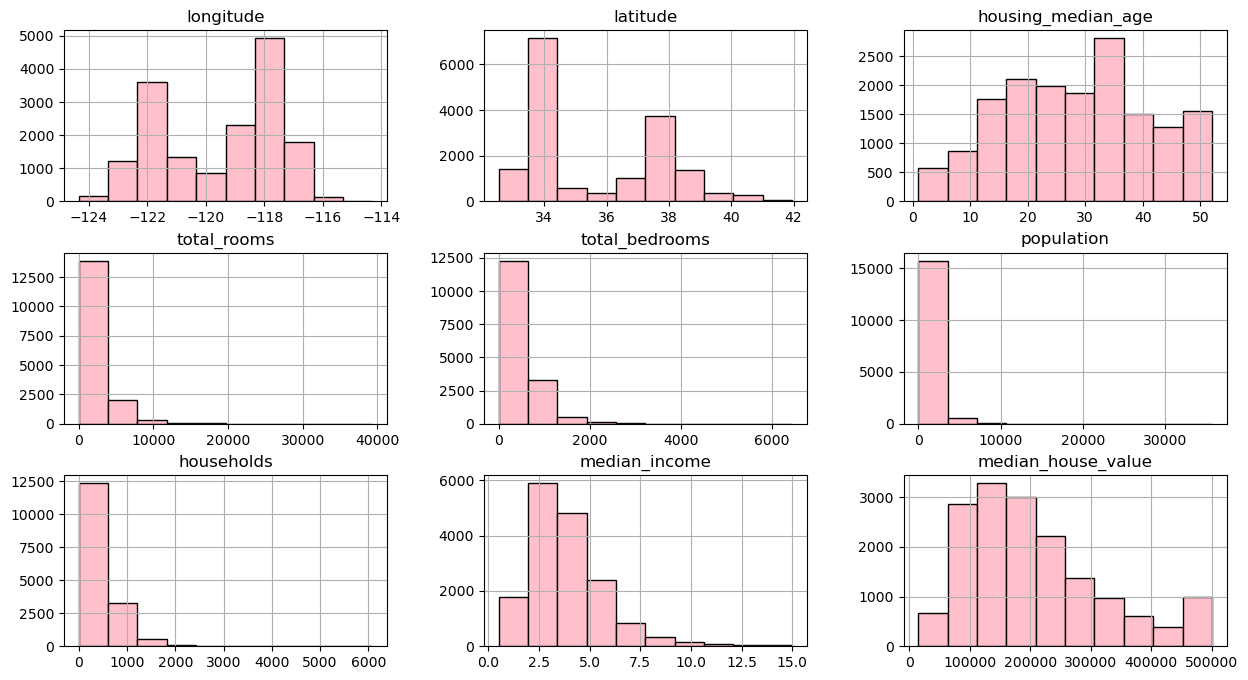

In [10]:
train_data.hist(figsize=(15,8),color = "pink",edgecolor = "black")

### Correlation Matrix

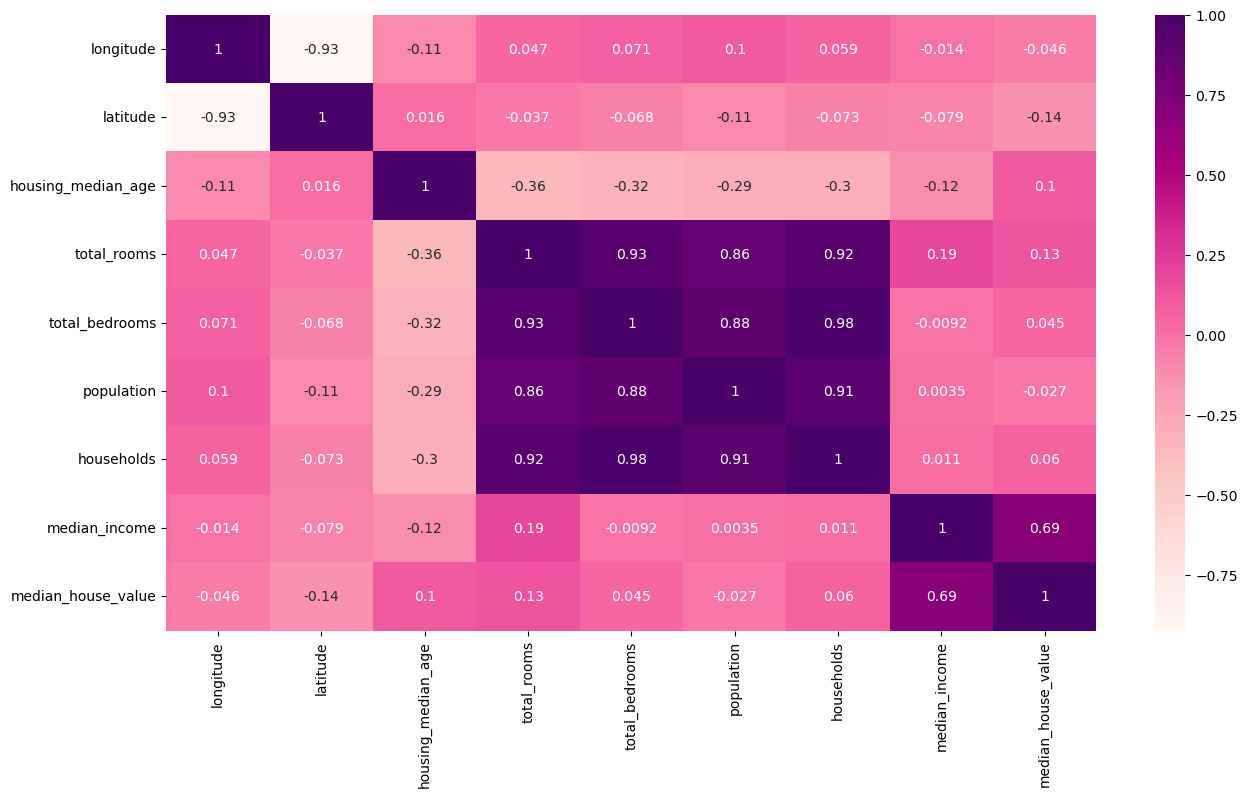

In [11]:
temp_train_data = train_data.drop(['ocean_proximity'], axis=1)
plt.figure(figsize=(15,8))
sns.heatmap(temp_train_data.corr(), annot=True, cmap="RdPu")
plt.show()

## Data Preprocessing

In [12]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

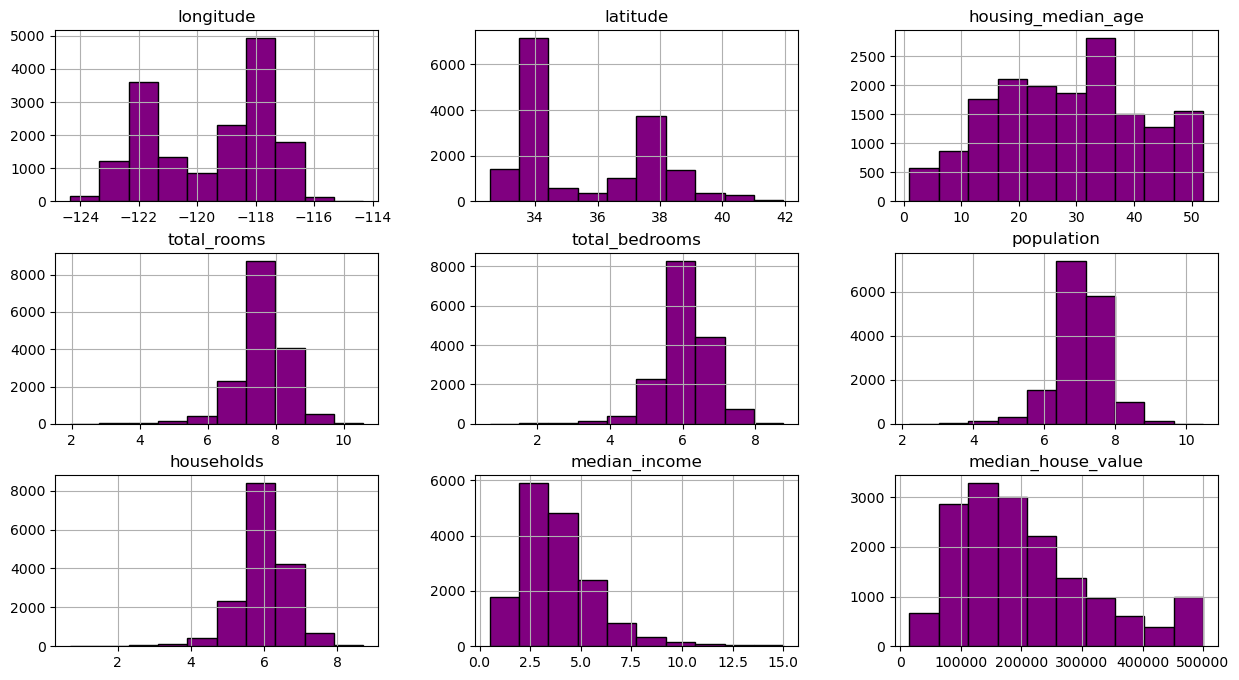

In [13]:
train_data.hist(figsize=(15,8) ,color = "purple", edgecolor = "black")
plt.show()

### Encoding Categorical Features

In [14]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7192
INLAND        5181
NEAR OCEAN    2126
NEAR BAY      1845
ISLAND           2
Name: count, dtype: int64

In [15]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [16]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
6265,-117.94,34.05,34.0,7.455877,5.783825,7.201916,5.783825,3.7708,163500.0,True,False,False,False,False
14831,-117.09,32.68,30.0,7.887209,6.483107,7.599902,6.406880,2.8089,120600.0,False,False,False,False,True
5926,-117.80,34.11,25.0,8.525161,6.711740,7.884200,6.688355,4.7969,211700.0,False,True,False,False,False
13763,-117.12,34.06,38.0,5.641907,4.025352,5.023881,3.970292,1.3906,120800.0,False,True,False,False,False
16975,-122.31,37.56,40.0,7.209340,5.802118,6.553933,5.697093,3.3200,292900.0,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14818,-117.11,32.68,36.0,3.295837,2.708050,4.077537,3.178054,1.9107,125000.0,False,False,False,False,True
13065,-121.32,38.56,18.0,7.064759,5.231109,6.421622,5.262690,4.5766,108700.0,False,True,False,False,False
2164,-119.82,36.77,36.0,7.720018,6.150603,7.019297,6.093570,2.9081,65600.0,False,True,False,False,False
1846,-122.28,37.90,52.0,7.222566,5.521461,6.196444,5.517453,4.1212,287500.0,False,False,False,True,False


### Updated Correlation Matrix

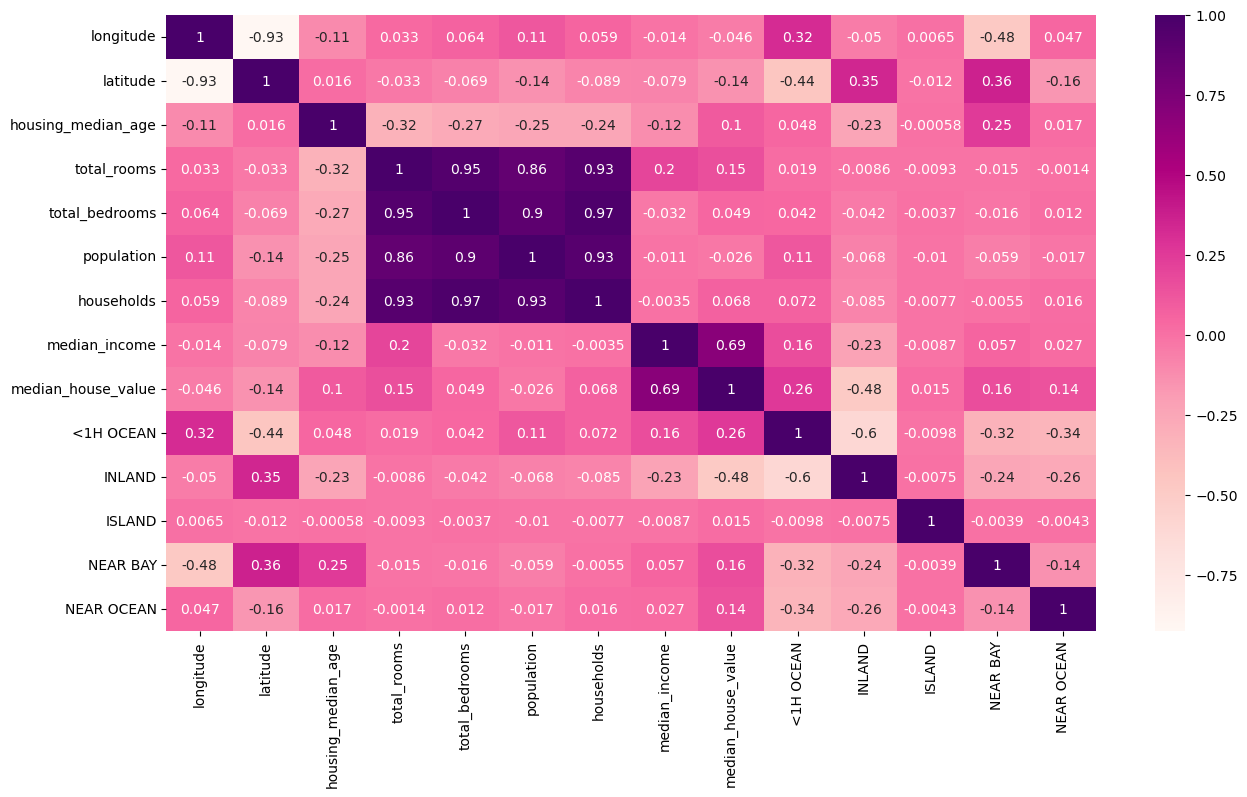

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="RdPu")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='latitude', ylabel='longitude'>

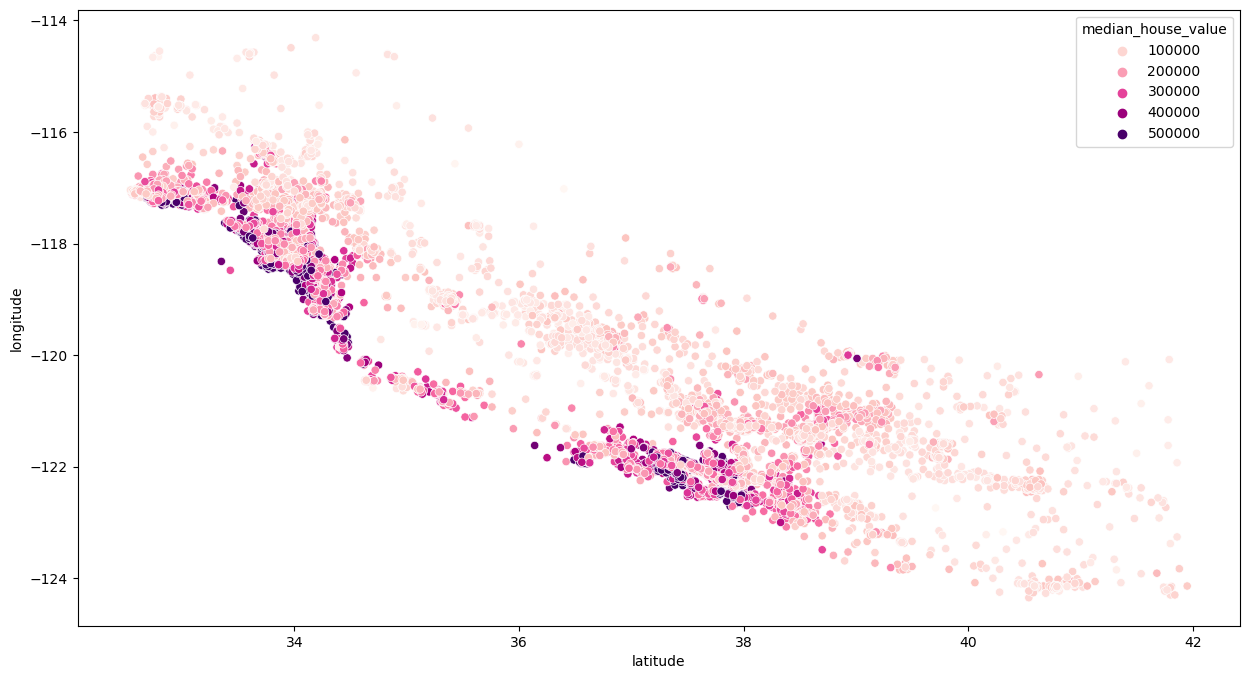

In [18]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='RdPu')

## Feature Engineering
household_rooms and bedroom_ratio

In [19]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

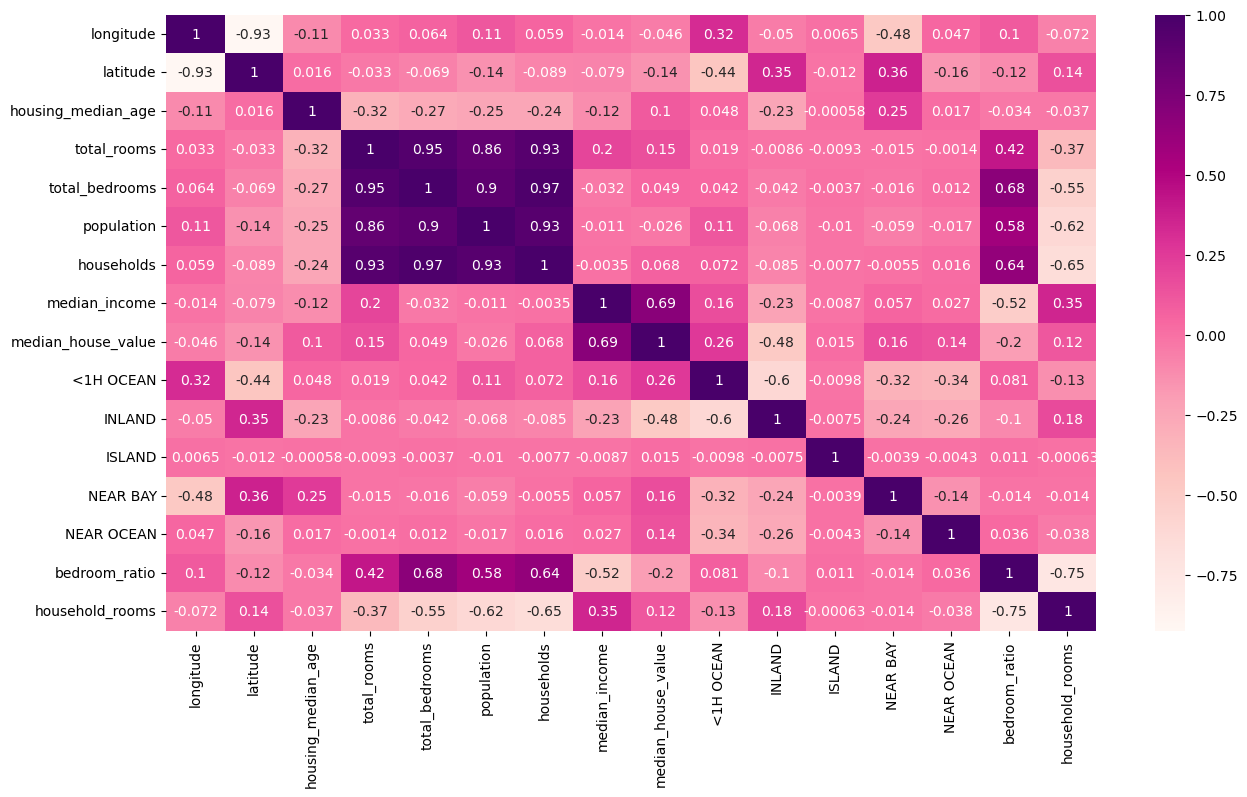

In [20]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="RdPu")
plt.show()

## Model: Linear Regression

### Scaling the Features
- StandardScaler.

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler =StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)




### Training the Model

In [22]:
reg = LinearRegression()

reg.fit(X_train_s, y_train)

LinearRegression()

### Preparing Test Data

In [23]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']


### Evaluating Linear Regression

In [24]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']
X_test_s = scaler.transform(X_test)

reg.score(X_test_s, y_test)

0.6699953470310482

In [25]:
import pickle
with open('linear_regression_model.pkl', 'wb') as model_file:
    pickle.dump(reg, model_file)
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

### UI created using Bokeh for prediction in the same directory with name app.py

## Conclusion
--- 

1.	**Data Preprocessing**:
	-	Essential for normalizing skewed distributions and encoding categorical variables.
	-	Improved the suitability of the data for linear models.

2.	**Feature Engineering**:
	-	Creating new features like bedroom_ratio and household_rooms added valuable information, enhancing model performance.

3.	**Model Evaluation**:
	-	Splitting data before EDA and preprocessing prevented data leakage, ensuring unbiased evaluation.
	-	Linear Regression provided a baseline.

4.	**Exploratory Data Analysis (EDA)**:
	-	Guided feature selection and engineering through understanding feature-target relationships.
	-	Data visualization revealed underlying data patterns.
	
5.	**Model Performance**:
	-	Linear Regression was simple but limited.